In [1]:
using JuMP
using GLPKMathProgInterface

 Consider the following maximization problem.

$$\max_x         x_1 + \frac 1 4 x_2$$
$$\frac 1 2 x_1 + x_2 \leq 1$$
$$2 x_1 + x2 \leq 2$$
$$x_1 \geq 0, x_2 \geq 0$$

a) Guess the solution. Plot the constraints and the objective function. Justify your guess.

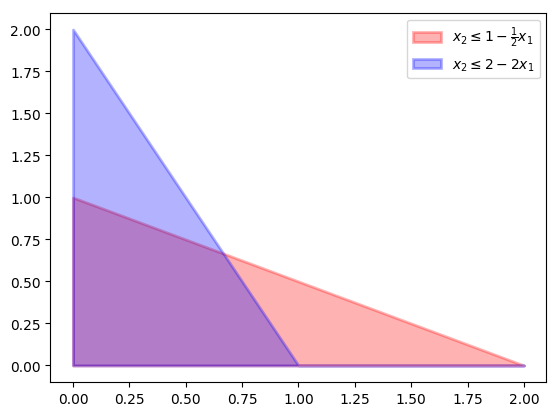

PyObject <matplotlib.legend.Legend object at 0x136895198>

In [4]:
using PyPlot
x1 = collect(0:0.1:2)
x2b = ifelse.(1-0.5*x1.>=0,1-0.5*x1,0)
x2c = ifelse.(2-2*x1.>=0,2-2*x1,0)


fig, ax = subplots()
ax[:fill_between](x1,x2b,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2c,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")


Possible values for $x_1$ and $x_2$ should come from the tetrahedron that is formed by the overlap of ranges defined by the constraints. Let us assume that the solution is x1 = 1 and x2 = 0. This makes the value of the objective function 1. Now, if we give up 0.25 from x1, the maximum possible value for x2 is 0.5, making the value of the objective function 1. If we give up 0.5 from x1, the maximum possible value for x2 is 0.75, making the value of the objective function 0.6875. Since 1 looks like the maximum possible value for the objective function, the optimal solution as per my guess is (1,0) or (0.75, 0.5)

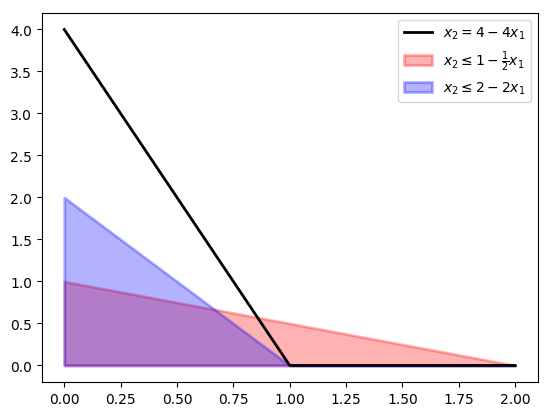

PyObject <matplotlib.legend.Legend object at 0x136f9c320>

In [27]:
using PyPlot
x1 = collect(0:0.1:2)
x2b = ifelse.(1-0.5*x1.>=0,1-0.5*x1,0)
x2c = ifelse.(2-2*x1.>=0,2-2*x1,0)
x2a = ifelse.(4-4x1.>=0, 4-4x1, 0)

fig, ax = subplots()
ax[:fill_between](x1,x2b,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2c,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2a,color="black",linewidth=2,label=L"x_{2} = 4 - 4x_{1}",alpha=1)
ax[:legend](loc="upper right")

b) Using Julia define and solve the above problem 'as is'.

In [9]:
using JuMP
using GLPKMathProgInterface

myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, 0.25*x2+x1)
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [10]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  2.525651 seconds (1.44 M allocations: 75.627 MiB, 1.57% gc time)
Objective value: 1.0
x1 = 1.0
x2 = 0.0


c) Rewrite it in the standard form.

$$\min_x         -x_1 - \frac 1 4 x_2$$
$$\frac 1 2 x_1 + x_2 + x_3 = 1$$
$$2 x_1 + x_2 + x_4 = 2$$
$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0$$

d) Using Julia define and solve the above problem in the standard form.

In [22]:
using JuMP
using GLPKMathProgInterface

using JuMP
using GLPKMathProgInterface

model = Model(solver=GLPKSolverLP())
c = [-1;-0.25;0;0]
b = [1;2]
A= [0.5 1 1 0;
    2 1 0 1]
m, n = size(A)
@variable(model, x[1:n] >= 0)
for i=1:m
    @constraint(model, sum(A[i,j]*x[j] for j=1:n) == b[i])
end
@objective(model, Min, sum(c[j]*x[j] for j=1:n))
print(model)

Min -x[1] - 0.25 x[2]
Subject to
 0.5 x[1] + x[2] + x[3] = 1
 2 x[1] + x[2] + x[4] = 2
 x[i] ≥ 0 ∀ i ∈ {1,2,3,4}


In [24]:
@time begin
    status = solve(model)
end
println("Objective value: ", getobjectivevalue(model))
println("Optimal Solution: ", getvalue(x))

  0.080701 seconds (16.52 k allocations: 899.041 KiB)
Objective value: -1.0
Optimal Solution: 

[1.0, 0.0, 0.5, 0.0]


E) Compare the solutions in item B and D.

Both the approaches resulted in the same solution

F) Rework items A and B if the objective function is  $x_1+x_2$.

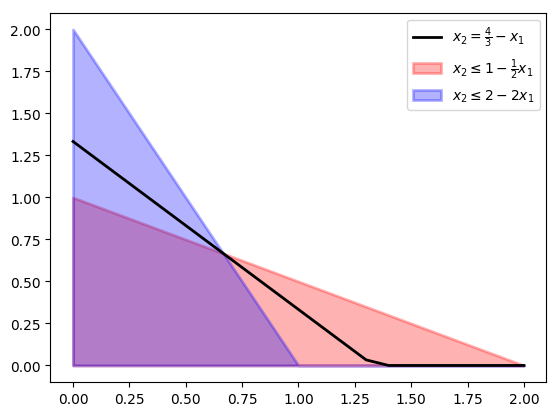

PyObject <matplotlib.legend.Legend object at 0x1376b9cc0>

In [30]:
using PyPlot
x1 = collect(0:0.1:2)
x2b = ifelse.(1-0.5*x1.>=0,1-0.5*x1,0)
x2c = ifelse.(2-2*x1.>=0,2-2*x1,0)
x2a = ifelse.(4/3 -x1.>=0,4/3 - x1,0)

fig, ax = subplots()
ax[:fill_between](x1,x2b,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2c,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2a,color="black",linewidth=2,label=L"x_{2} = \frac{4}{3} - x_{1}",alpha=1)
ax[:legend](loc="upper right")

In [ ]:
Possible values for $x_1$ and $x_2$ should come from the tetrahedron that is formed by the overlap of ranges defined by the constraints. Let us assume that the solution is x1 = 1 and x2 = 0. This makes the value of the objective function 1. Now, if we give up 0.25 from x1, the maximum possible value for x2 is 0.5, making the value of the objective function 1.25. If we give up 1/3 from x1, the maximum possible value for x2 is 2/3, making the value of the objective function 1.333. Since this looks like the maximum possible value for the objective function, the optimal solution as per my guess is (2/3, 2/3).

In [31]:
using JuMP
using GLPKMathProgInterface

myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x2+x1)
print(myModel)

@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

Max x2 + x1
Subject to
 0.5 x1 + x2 ≤ 1
 2 x1 + x2 ≤ 2
 x1 ≥ 0
 x2 ≥ 0
  0.000421 seconds (75 allocations: 5.047 KiB)
Objective value: 1.3333333333333335
x1 = 0.6666666666666667
x2 = 0.6666666666666666


In [ ]:
Julia's solution is the same as my guess.